## IMPORTS

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
plt.style.use('seaborn-whitegrid')

## VALUES OF CONSTANTS

In [2]:
c2 = 0.39999
c3 = 1/2
c4 = 1
a31 = ((4 * c2) - 1) / (8 * c2)
a32 = 1 / (8 * c2)
a41 = (1 - (2 * c2)) / (2 * c2)
a42 = -1 / (2 * c2)
a43 = 2
b1 = 1/6
b2 = 0
b3 = 2/3
b4 = 1/6

In [3]:
t2,t3 = c2, c3
w1, w2 = a31,a42

In [4]:
t2,t3 = c2, c3
w1, w2 = a31,a42
c1,c2,c3,c4 = b1,b2,b3,b4
t2,t3,w1,w2,

(0.39999, 0.5, 0.18749218730468262, -1.2500312507812694)

In [5]:
c1,c2,c3,c4

(0.16666666666666666, 0, 0.6666666666666666, 0.16666666666666666)

In [6]:
#Conditions given
# ROLL NUMBER = CS-19020
a = 20    
b = 1.33

CONST = (b-1)/(a+b)
START = 0
END = (a*b)/(a+b)
INITIAL = (b-1)/b
N = 8
H = (END - START)/N

In [7]:
H

0.15588373183309895

# Classical Runge Kutta Method

In [8]:
def dydx(x, y):
    return (CONST * x * y)

# Finds value of y for a given x using step size h
# and initial value y0 at x0.

def rungeKutta(x0, y0, final, h):
    n = (int)((final - x0)/h)
    
    y = [y0]
    x=[x0]
    
    
    for i in range(1, n+1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y[i-1])
        k2 = h * dydx(x0 + 0.5 * h, y[i-1] + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y[i-1] + 0.5 * k2)
        k4 = h * dydx(x0 + h, y[i-1] + k3)

        # Update next value of y
        tmp = y[i-1] + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        y.append(tmp)
        # Update next value of x
        x0 = x0 + h
        x.append(x0)
    #return (x,y)
    return (x,y,y[-1],i)



x_values0, y_values_C0,final_y,iterations = rungeKutta(START,INITIAL,END, H)
# print ('The value of y at x is:', final_y)
# print(iterations)
# print(y_values_C0)
# print(x_values0)
x_values1, y_values_C1,final_y,iterations = rungeKutta(START,INITIAL,END, H/2)
# print(iterations)
x_values2, y_values_C2,final_y,iterations = rungeKutta(START,INITIAL,END, H/4)
# print(iterations)
x_values3, y_values_C3,final_y,iterations = rungeKutta(START,INITIAL,END, H/8)
# print(iterations)
x_values4, y_values_C4,final_y,iterations = rungeKutta(START,INITIAL,END, H/16)
# print(iterations)


# ODE using Exact Method

In [9]:
def exact(x_list,c,y0):
    y = []
    for i in x_list:
        y.append(y0*math.exp(0.5*c*(i**2)))
    return y

y_values_E0 = exact(x_values0, CONST, INITIAL)
y_values_E1 = exact(x_values1, CONST, INITIAL)
y_values_E2 = exact(x_values2, CONST, INITIAL)
y_values_E3 = exact(x_values3, CONST, INITIAL)
y_values_E4 = exact(x_values4, CONST, INITIAL)

# Modified Runge Kutta

In [10]:

def dydx(x, y):
    return (CONST * x * y)

# Finds value of y for a given x using step size h
# and initial value y0 at x0.

def modrungeKutta(x0, y0, final, h):
    n = (int)((final - x0)/h)
    y = [y0]
    x=[x0]
    
    t0,t1,t2,t3   = [0, 0.3999999, 0.5, 1]
    w0,w1,w2,w3   = [0, 0.18749921874804687, -1.2500031250078125, 1]
    c1, c2,c3, c4 = [0.1667, 0, 0.6666, 0.1667]
    
    #c1,c2,c3,c4=[1/10,4/10,4/10,1/10]
    #c1,c2,c3,c4=[1/10,10/4,10/4,1/10]
    #c1, c2,c3, c4 = [0.1667, 0, 0.6666, 0.1667] 
   # t0,t1,t2,t3 = [0,1/3,2/3, 1]
    #w0,w1,w2,w3 = [0,1/3,-1/3, 1]
    

    
    for i in range(1, n+1):
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y[i-1])
        k2 = h * dydx(x0 + t1 * h, y[i-1] + w1 * k1)
        k3 = h * dydx(x0 + t2 * h, y[i-1] + w2 * k2)
        k4 = h * dydx(x0 + h, y[i-1] + k3)

        # Update next value of y
        tmp = y[i-1] + (c1*k1 + c2 * k2 + c3 * k3 + c4*k4)
        y.append(tmp)
        # Update next value of x
        x0 = x0 + h
        x.append(x0)
    return (x,y)



x_valuesM0, y_values_M0 = modrungeKutta(START,INITIAL,END, H)
x_valuesM1, y_values_M1 = modrungeKutta(START,INITIAL,END, H/2)
x_valuesM2, y_values_M2 = modrungeKutta(START,INITIAL,END, H/4)
x_valuesM3, y_values_M3 = modrungeKutta(START,INITIAL,END, H/8)
x_valuesM4, y_values_M4 = modrungeKutta(START,INITIAL,END, H/16)

x_values = [x_values0,x_values1,x_values2,x_values3,x_values4]
y_values_C = [y_values_C0, y_values_C1, y_values_C2, y_values_C3, y_values_C4]
y_values_E = [y_values_E0,y_values_E1,y_values_E2,y_values_E3,y_values_E4]
y_values_M = [y_values_M0,y_values_M1,y_values_M2,y_values_M3,y_values_M4]



In [11]:
def rmse(y, y_approx):
    mse= mean_squared_error(y, y_approx)
    return sqrt(mse)

# Analyzing the Methods Using Graphs

[4.088745808834166e-15, 1.4717692541468573e-16, 4.734006883291518e-17, 2.900833048005282e-17, 3.793708036958625e-17]
[2.961401114960374e-06, 1.4107685610050978e-06, 6.862023008926265e-07, 3.3809832957926324e-07, 1.6777286466076287e-07]


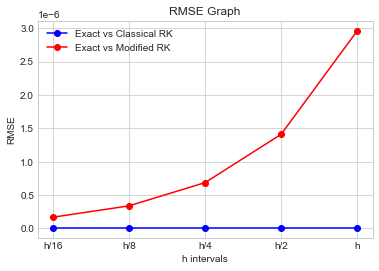

Text(0.5, 1.0, 'Graph of Error Reduction')

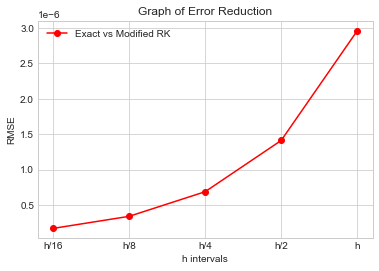

In [12]:
rmse_list=[]
rmse_list2=[]

h_list = ['h/16','h/8','h/4','h/2','h']

for i in range(len(h_list)):
    tmp= rmse(y_values_E[i], y_values_C[i])
    rmse_list.append(tmp)
    rmse_list2.append(rmse(y_values_E[i], y_values_M[i]))

print(rmse_list)
print(rmse_list2)
plt.plot(h_list, rmse_list[::-1], marker='o', color='blue', label="Exact vs Classical RK")
plt.plot(h_list, rmse_list2[::-1], marker='o', color='red', label="Exact vs Modified RK")
plt.xlabel('h intervals')
plt.ylabel('RMSE')
plt.title('RMSE Graph')
plt.legend()
plt.show()
plt.plot(h_list, rmse_list2[::-1], marker='o', color='red',label="Exact vs Modified RK")
plt.xlabel('h intervals')
plt.ylabel('RMSE')
plt.legend()
plt.title('Graph of Error Reduction')

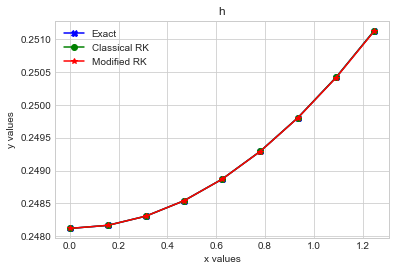

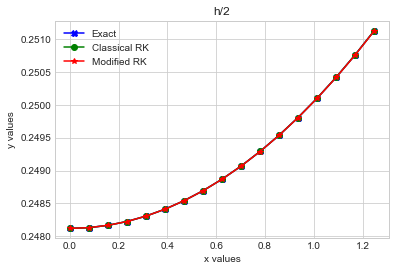

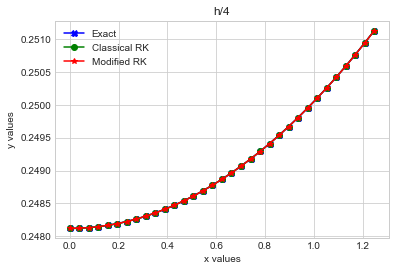

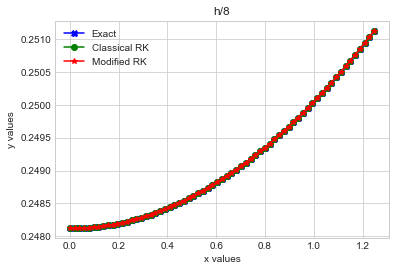

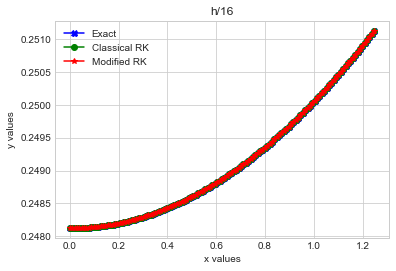

In [13]:
h_list=['h', 'h/2', 'h/4', 'h/8', 'h/16']

for i in range(5):
    plt.plot(x_values[i], y_values_E[i], marker='X',color='blue', label='Exact')
    plt.plot(x_values[i], y_values_C[i], marker='o',color='green', label='Classical RK')
    plt.plot(x_values[i], y_values_M[i], marker='*',color='red', label="Modified RK")
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.title(h_list[i])
    plt.legend()
    plt.show()

# Tabular Results From The 3 Methods

In [14]:
from tabulate import tabulate

def tabulate_data(x_list, y_list):
    data = []
    for i in range(len(x_list)):
        data.append([i,x_list[i],y_list[i]])
        
    return tabulate(data, headers=["Step", "X", "Y"])
    

print(tabulate_data(x_values0,y_values_E0))
print(tabulate_data(x_values0,y_values_C0))
print(tabulate_data(x_values0,y_values_M0))

  Step         X         Y
------  --------  --------
     0  0         0.24812
     1  0.155884  0.248167
     2  0.311767  0.248307
     3  0.467651  0.24854
     4  0.623535  0.248868
     5  0.779419  0.249289
     6  0.935302  0.249805
     7  1.09119   0.250416
     8  1.24707   0.251123
  Step         X         Y
------  --------  --------
     0  0         0.24812
     1  0.155884  0.248167
     2  0.311767  0.248307
     3  0.467651  0.24854
     4  0.623535  0.248868
     5  0.779419  0.249289
     6  0.935302  0.249805
     7  1.09119   0.250416
     8  1.24707   0.251123
  Step         X         Y
------  --------  --------
     0  0         0.24812
     1  0.155884  0.248167
     2  0.311767  0.248307
     3  0.467651  0.24854
     4  0.623535  0.248867
     5  0.779419  0.249287
     6  0.935302  0.249802
     7  1.09119   0.250412
     8  1.24707   0.251116
